In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

from sklearn.ensemble import IsolationForest

In [2]:
# functions TODO: fix error probability 
def generate_dataset(normal_distribution, samples):
    
    # sample 90% from normal dataset
    gaus_dist = random.sample(list(normal_distribution), samples)
    normal_points = ["no" for e in gaus_dist]

    numbers = gaus_dist  # + error_dist 
    labels = normal_points # + outliers 

    # Create df with two columns (number, label)
    df = pd.DataFrame({'number': numbers, 'label_gt': labels})
    df["numeric_label_gt"] = np.where(df['label_gt'] == "yes", -1, 1)

    # shuffle rows
    df = df.sample(frac=1)

    return df


def train_IF(dataset, n_estimators=50, max_samples='auto', contamination=0.1,max_features=1.0):
    # Train IF
    model=IsolationForest(n_estimators=n_estimators, max_samples=max_samples, contamination=contamination, max_features=max_features)
    model.fit(dataset[['number']])

    dataset['scores']=model.decision_function(dataset[['number']])
    dataset['anomaly']=model.predict(dataset[['number']])
    dataset["anomaly"] = np.where(dataset['anomaly']== -1, "yes", "no")

    outliers=dataset.loc[dataset['anomaly']=="yes"]
    outlier_index=list(outliers.index)

    return model, dataset

def anomaly_detection_visualisation(df):
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    plt.plot(df['number'],df['scores'], '.')
    plt.title("datapoints and predicted anomaly score")
    plt.xlabel("datapoint (number)")
    plt.ylabel("anomaly score")
    outliers = df[df["anomaly"] == "yes"]
    non_outliers = df[df["anomaly"] == "no"]
    
    plt.figure()
    plt.title("outliers and non outliers")
    outliers_data = pd.DataFrame({'number': outliers["number"], 'scores': outliers["scores"]})
    sns.scatterplot(x="number", y="scores", data=outliers_data, palette='red', label='outliers');

    normal_data = pd.DataFrame({'number': non_outliers["number"], 'scores': non_outliers["scores"]})
    sns.scatterplot(x="number", y= "scores", data=normal_data, palette='green', label='non outliers');

    # plt.figure()
    # plt.title("outliers anomaly score")
    # data = pd.DataFrame({'number': non_outliers["number"], 'scores': non_outliers["scores"]})
    # sns.scatterplot(x="number", y="scores", data=data, palette='g')

def plot_histogram_of_datasets(normal_dataset):    
    fig, ax = plt.subplots(1,1,figsize=(12,8))

    sns.histplot(normal_dataset, ax=ax, shrink=0.8, stat='count').set(title=f"Non outliers: Data distribution for mean:{normal_dataset.mean()} and std:{normal_dataset.std()}")
    ax.axvline(normal_dataset.mean(), color='green', label='mean')
    ax.legend()

    plt.show()
    print(f'μ_centered ={normal_dataset.mean()}')
    print(f'σ_centered ={normal_dataset.std()}')

#plot_histogram_of_datasets(s_normal_centered,s_normal_shifted)
#anomaly_detection_visualisation(df)

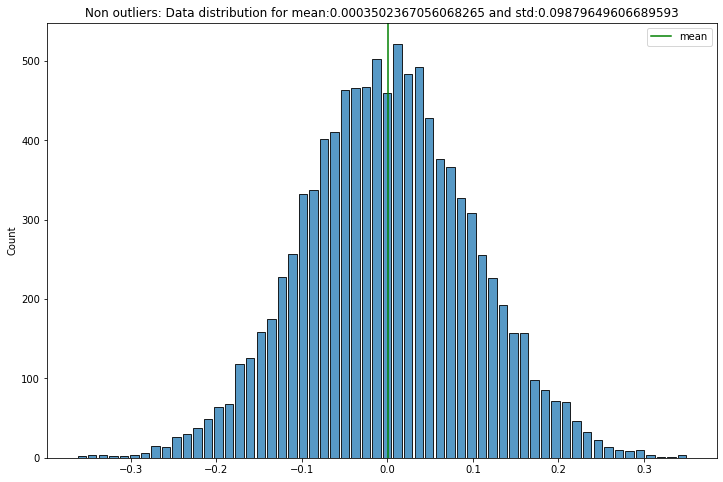

μ_centered =0.0003502367056068265
σ_centered =0.09879649606689593


/Users/p392827/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


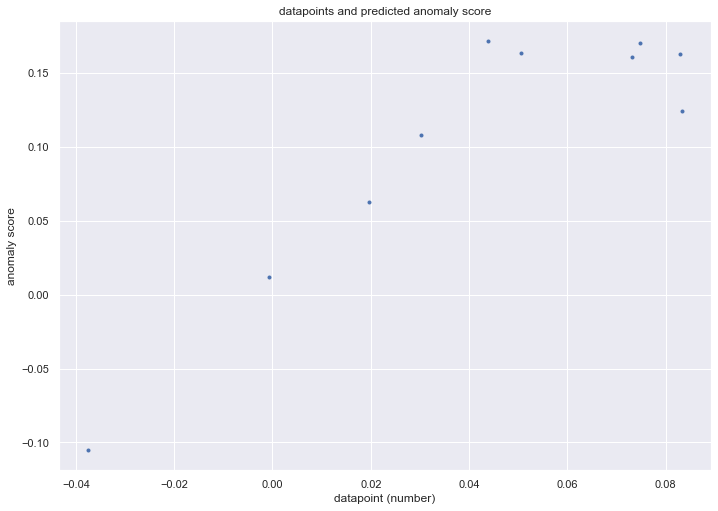

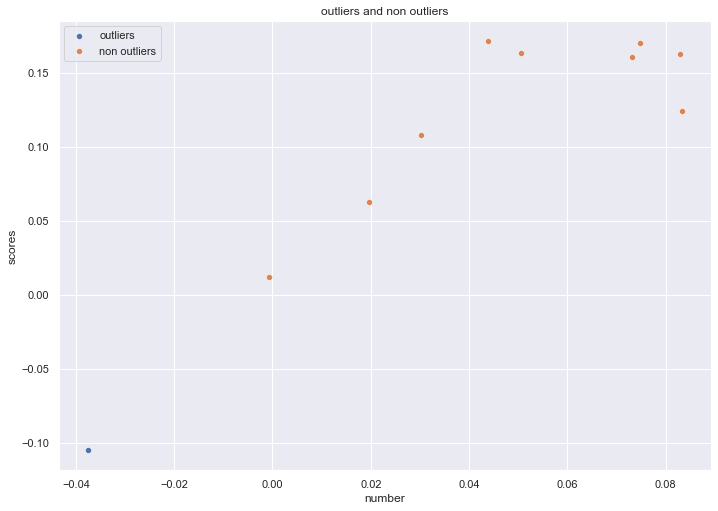

In [4]:

normal_distribution = np.random.normal(0, 0.1, 10000)

plot_histogram_of_datasets(normal_distribution)

# generate dataset 
ds1 = generate_dataset(normal_distribution, samples=10) # 1000

# Train IF 
model, ds1_post_det = train_IF(ds1, n_estimators=10) #  n_estimators=80) # , max_features= 0.2 , contamination=n_anomaleous_samples/n_normal_samples

# Visualization
anomaly_detection_visualisation(ds1_post_det)

# Extracting / calculating hyper space parameters

In [5]:
model.estimators_

[ExtraTreeRegressor(max_depth=4, max_features=1, random_state=1480443931),
 ExtraTreeRegressor(max_depth=4, max_features=1, random_state=723432741),
 ExtraTreeRegressor(max_depth=4, max_features=1, random_state=1387211576),
 ExtraTreeRegressor(max_depth=4, max_features=1, random_state=963386162),
 ExtraTreeRegressor(max_depth=4, max_features=1, random_state=1532984330),
 ExtraTreeRegressor(max_depth=4, max_features=1, random_state=167885287),
 ExtraTreeRegressor(max_depth=4, max_features=1, random_state=395476097),
 ExtraTreeRegressor(max_depth=4, max_features=1, random_state=351766522),
 ExtraTreeRegressor(max_depth=4, max_features=1, random_state=675493200),
 ExtraTreeRegressor(max_depth=4, max_features=1, random_state=603625643)]

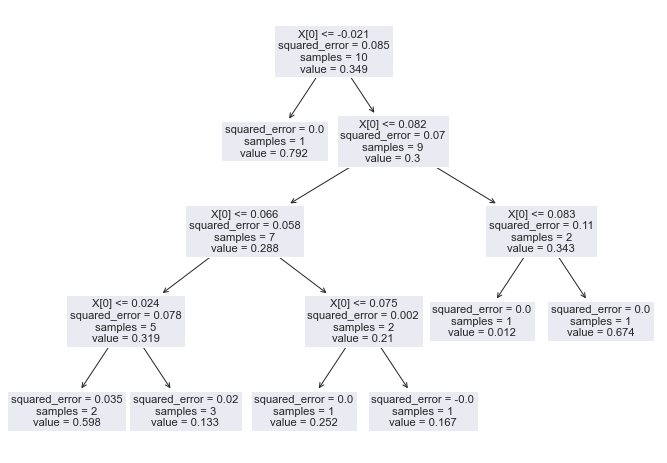

In [6]:
first_tree = model.estimators_[0] 

from sklearn.tree import plot_tree

plot_tree(first_tree)
plt.show();

In [7]:
n_nodes = first_tree.tree_.node_count
children_left = first_tree.tree_.children_left
children_right = first_tree.tree_.children_right
feature = first_tree.tree_.feature
threshold = first_tree.tree_.threshold

In [8]:
#print("feature_names_in_:",first_tree.feature_names_in_)
print("parameters:",first_tree.get_params())
print("number of nodes in Tree: ",n_nodes)
print("id of the left child of node i or -1 if leaf node: left children: ",children_left)
print("id of the right child of node i or -1 if leaf node: right children: ",children_right)
print("feature used for splitting node i: ",feature)
print("threshold value at node i: ",threshold)

parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': 1, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1480443931, 'splitter': 'random'}
number of nodes in Tree:  13
id of the left child of node i or -1 if leaf node: left children:  [ 1 -1  3  4  5 -1 -1  8 -1 -1 11 -1 -1]
id of the right child of node i or -1 if leaf node: right children:  [ 2 -1 10  7  6 -1 -1  9 -1 -1 12 -1 -1]
feature used for splitting node i:  [ 0 -2  0  0  0 -2 -2  0 -2 -2  0 -2 -2]
threshold value at node i:  [-0.02092903 -2.          0.08164701  0.06628596  0.02444554 -2.
 -2.          0.07463317 -2.         -2.          0.08323028 -2.
 -2.        ]


In [9]:
# Thresholds
print(np.unique(threshold))
print("number of thresholds: ",len(np.unique(threshold)))

[-2.         -0.02092903  0.02444554  0.06628596  0.07463317  0.08164701
  0.08323028]
number of thresholds:  7


In [10]:
# The subset of drawn samples for each base estimator.
print("parameters:",model.estimators_samples_[0])

parameters: [0 1 2 3 4 5 6 7 8 9]


In [11]:
model.get_params()

{'bootstrap': False,
 'contamination': 0.1,
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 10,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)

rectangle_edges = []

while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]

    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 13 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= -0.020929027777693912 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 0] <= 0.08164701187356564 else to node 10.
		node=3 is a split node: go to node 4 if X[:, 0] <= 0.06628596264740344 else to node 7.
			node=4 is a split node: go to node 5 if X[:, 0] <= 0.024445541954450905 else to node 6.
				node=5 is a leaf node.
				node=6 is a leaf node.
			node=7 is a split node: go to node 8 if X[:, 0] <= 0.07463317265228284 else to node 9.
				node=8 is a leaf node.
				node=9 is a leaf node.
		node=10 is a split node: go to node 11 if X[:, 0] <= 0.08323028112602071 else to node 12.
			node=11 is a leaf node.
			node=12 is a leaf node.


In [13]:
np.unique(threshold)

array([-2.        , -0.02092903,  0.02444554,  0.06628596,  0.07463317,
        0.08164701,  0.08323028])

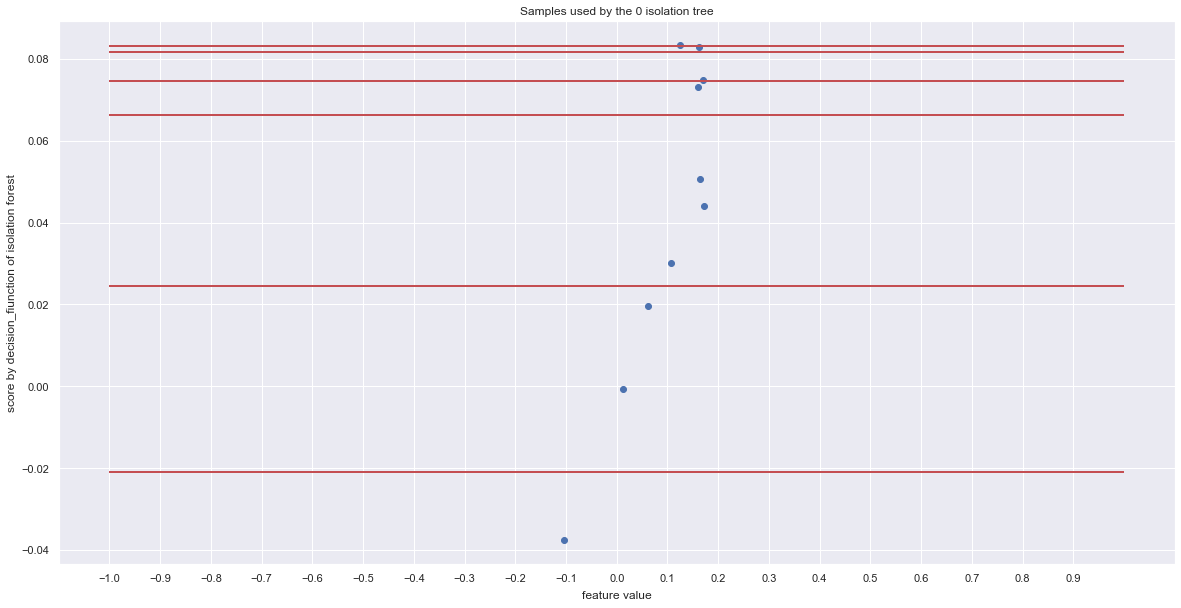

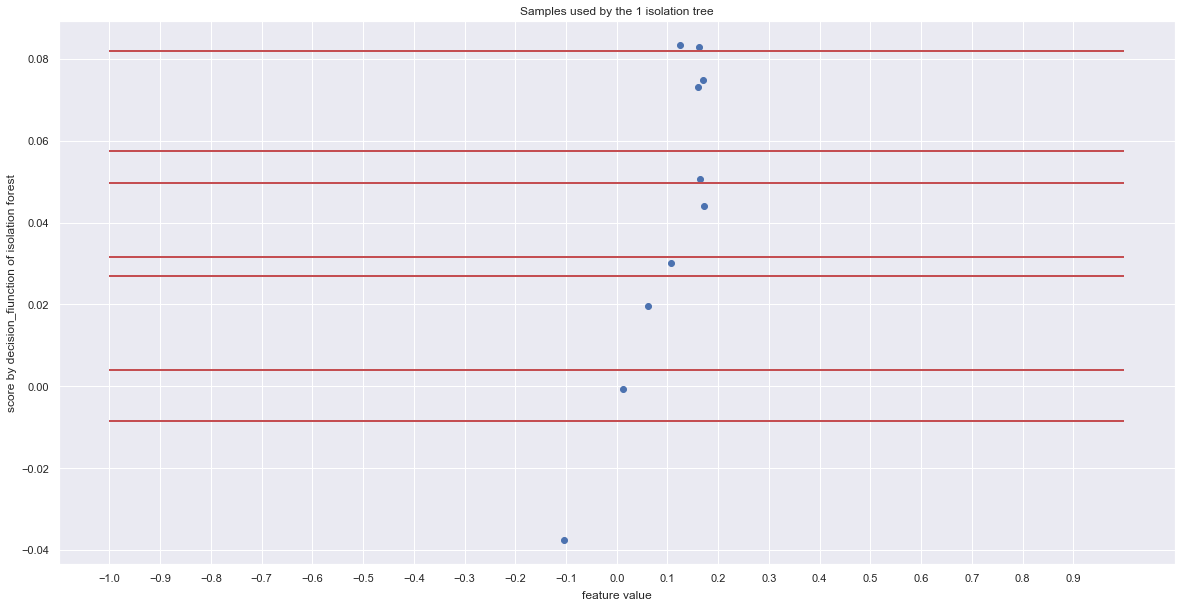

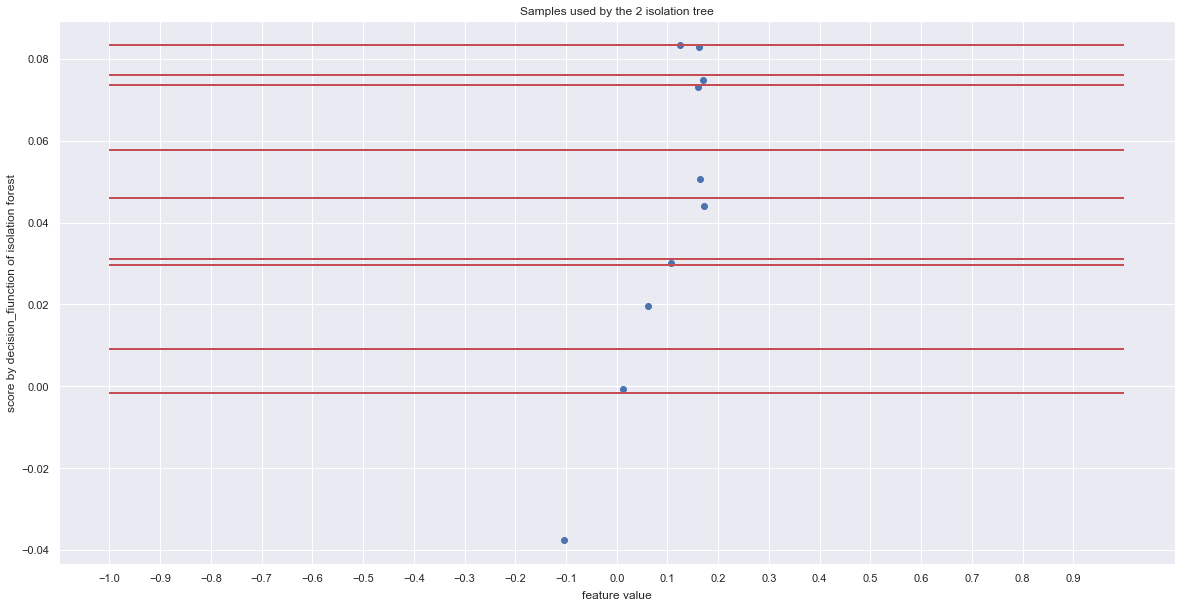

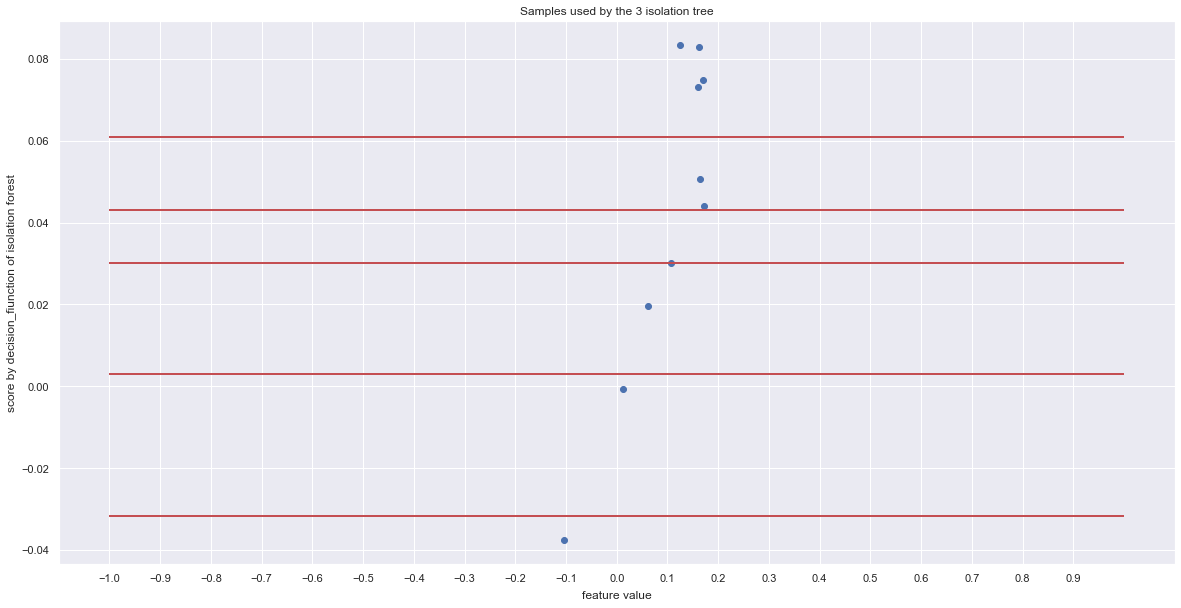

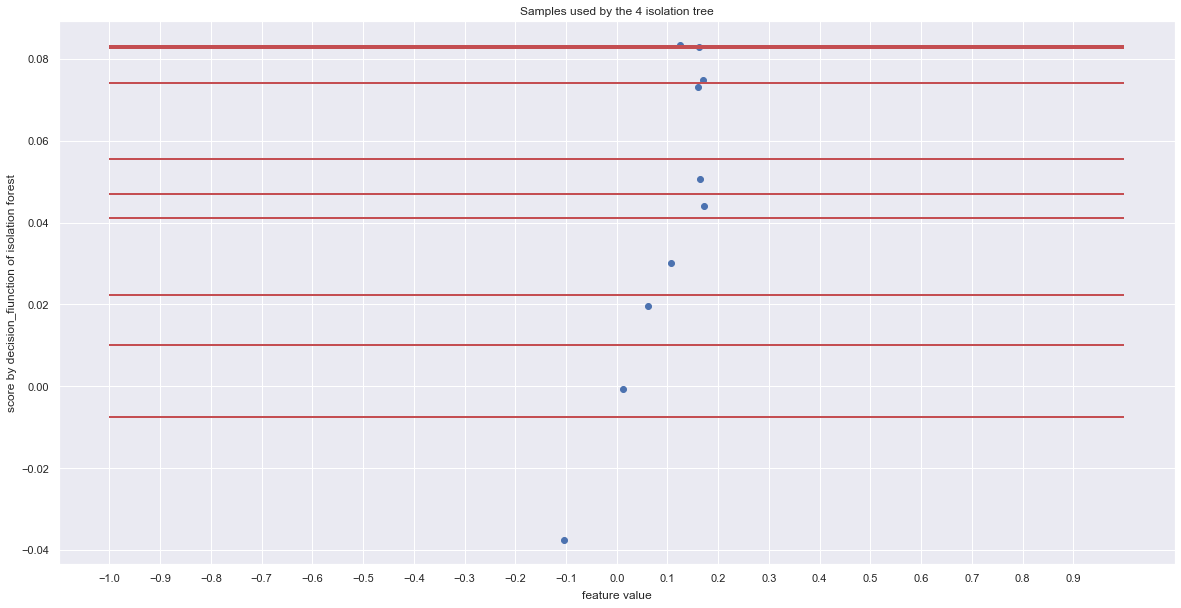

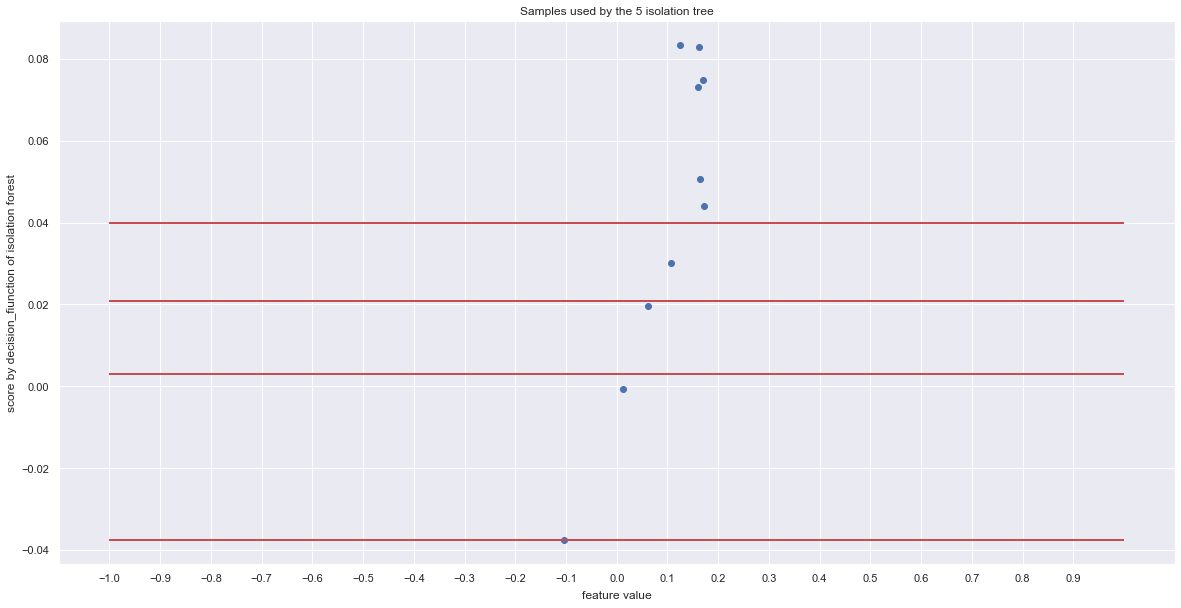

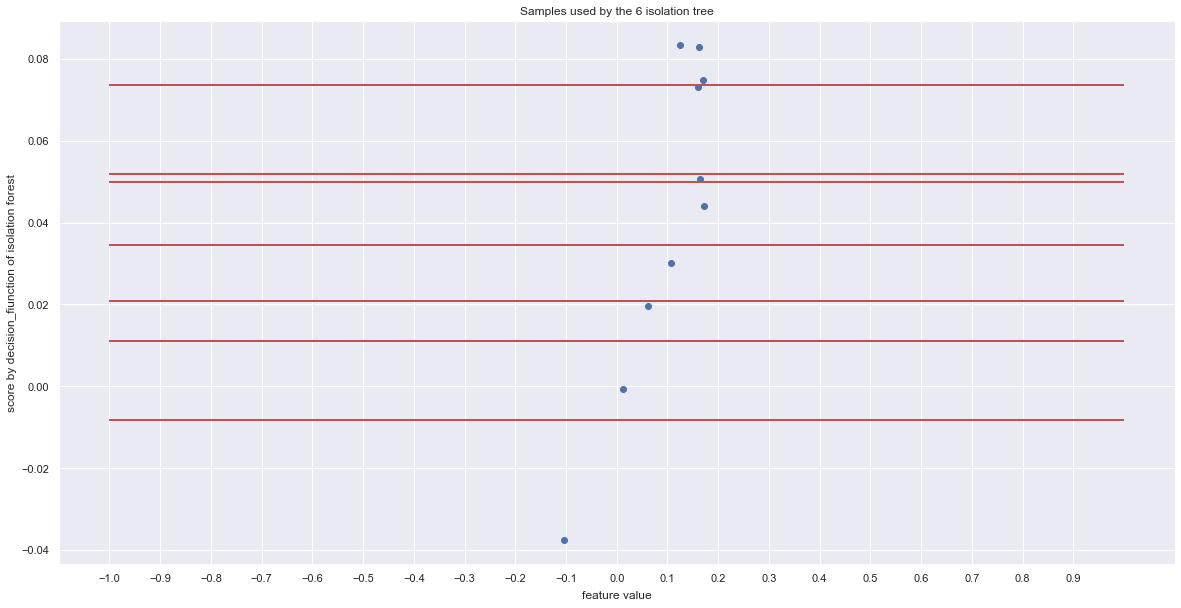

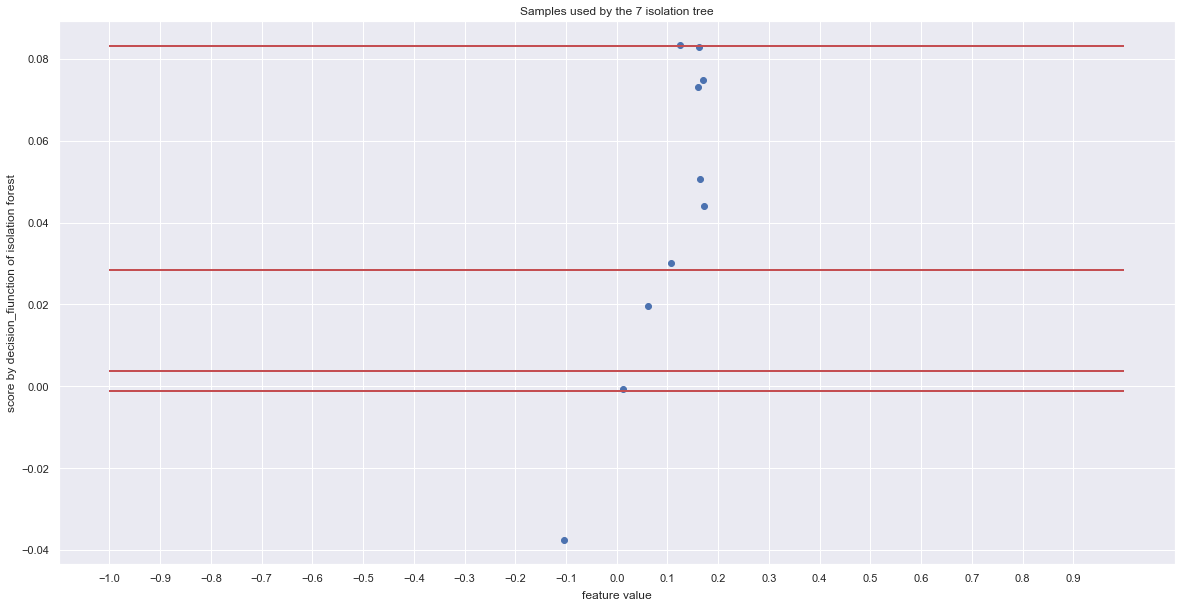

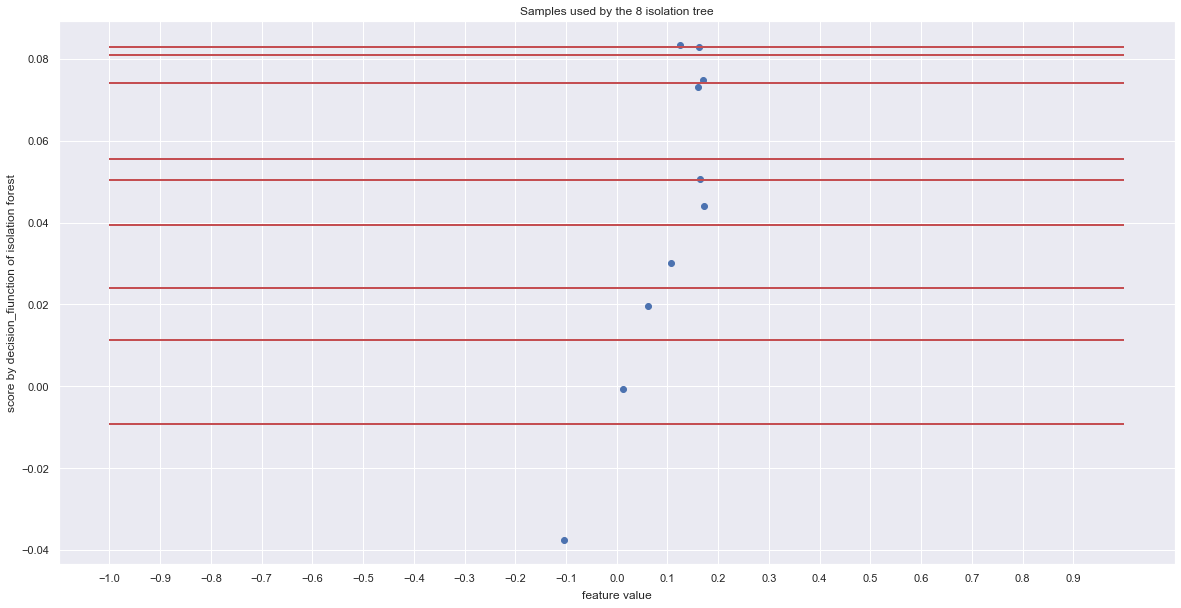

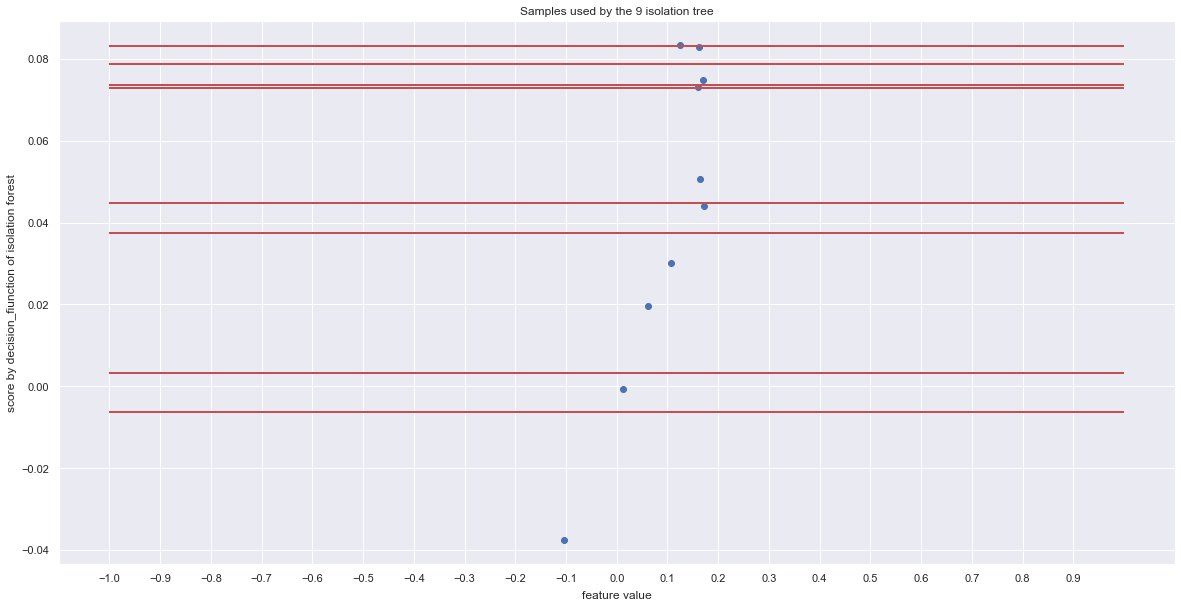

In [83]:
# TODO: plot the datapoints and use the splits to draw the edges of the hyper rectangles

def visualize_hyper_planes(model, dataset):
    #fig, axis = plt.subplots(len(model.estimators_samples_), 1, figsize=(25,15))

    for p in range(len(model.estimators_samples_)):
        indices_samples_tree = model.estimators_samples_[p]
        threshold = model.estimators_[p].tree_.threshold
        samples_tree = dataset['number'].values[indices_samples_tree]

        scores = model.decision_function(dataset[['number']])
        #print(scores)

        plt.figure(figsize=(20,10))
        plt.xticks(np.arange(-1, 1, step=0.1))  # Set label locations.
        plt.scatter(scores, samples_tree)
        plt.title(f"Samples used by the {p} isolation tree")

        # Tweak spacing to prevent clipping of tick-labels
        plt.xlabel("feature value", labelpad=7)
        plt.ylabel("score by decision_fiunction of isolation forest")

        for edge in np.unique(threshold): # [1:]:
            #plt.hlines(y=edge, xmin=np.min(dataset['number']), xmax=np.max(dataset['number']), linewidth=2)
            plt.hlines(y=edge, xmin=-1, xmax=1, linewidth=2, color='r')
        plt.show()

            
visualize_hyper_planes(model, dataset=ds1)

# Using decision path to get the list of nodes that were used for isolating the test point

In [80]:
X_test = 0.1
node_indicator = model.estimators_[0].decision_path(np.array(X_test).reshape(-1, 1))
leaf_id = model.estimators_[0].apply(np.array(X_test).reshape(-1, 1))

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]
node_index

array([ 0,  2, 10, 12], dtype=int32)

# Ongoing: Calculating U_h for f_hat
# TODO: create list of nodes that are used to isolate the test point 
# TODO: Change plot to 1D
# TODO: draw splits in plots and calculate their length
# TODO: retrieve visited nodes list from Tree
# TODO: Check meaning of plotted values in the Tree

# Algorithm PAC_RPAD

In [ ]:
# TODO: How to calculate log(H) 
# TODO: Add time complexity to the calculation of the size of the training dataset (O-Notation)

def rare_pattern_detect(training_dataset, delta, tau, epsilon):
	'''
	delta : failure probability
	tau : detection threshold
	epsilon : tolerance parameter
	'''

	H_hat = estimate_pattern_space(training_dataset)

	# Define Threshold for the estimated pattern probability
	mu = tau + epsilon / 2

	# Not needed cause we already have the dataset: 
	# - calculate the number of samples to draw using sample complexity
	# - N = size_training_dataset_D(delta, epsilon, H) # (1/epsilon**2) * (np.log(H) + np.log(1/delta))
	# - draw training set D of N instances from P
	# - D = generate_training_dataset(N, P)

	results = []
	# for each data point x in training_dataset do:
	for datapoint_counter, x in enumerate(D):
		classification_decision = has_rare_pattern(x,training_dataset,H_hat,mu)
		results.append([x,classification_decision])

	return results


def estimate_pattern_space(training_dataset): # -> list_of_patterns:
	# call IF (training_dataset)
	# TODO: extract the patterns from the estimators (ExtraTreeRegressor list)
    # H = pattern space (list of ExtraTreeRegressor)
    H = model.estimators_

	return H_hat


def has_rare_pattern(x,D,H_hat,mu):
	'''
	x : datapoint
	D : trained set 
	H : pattern space 
	mu : Threshold for the estimated frequency of a pattern to be detected :  tau + epsilon/2
	'''
	# TODO: estimate U
	U_h = calculate_U_h(x, H)

	# size_D = calculate_size_of_training_data_set(D) # |D| # (length of D)
	for pattern_counter, h in enumerate(H): 

		# estimate the normalized pattern probiblites (f_hat) using the patterns h that that satistfy h(x) == 1  
		estimated_pattern_probability = f_hat(x, h, D, U_h)

		# decision_rule: detect x as anomaleous if any estimated normalized pattern probability is smaller than mu (f_hat(h) < mu)
		if estimated_pattern_probability < mu:
			rare = True # (anomaly)
		else:
			rare = False # (normal)

		decision.append(estimated_pattern_probability, rare)

	return rare


def f_hat(x, h, D, U_h):
	'''
	x : datapoint
	h : trained set 
	|D| : size of training set?
	U_h : The area of the rectangle (pattern) in the pattern space
	'''
	# list of points that satisfy h(x) == 1
	l = [x if h(x) == 1 for x in D]
	f_hat = (len(l)) / (len(D) * U_h)
	return f_hat


# TODO: Calculate U_h 
def calculate_U_h(x, H):
	"""
	Calculate U(h) based on the area of the hyper rectangle used to isolate the data point
	x : data point
	H : Pattern space
	"""
	return U_h